In [30]:
### importing required libraries for the project

In [29]:
import pandas as pd # for reading and handling the dataset
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
from sklearn.preprocessing import StandardScaler # for standardizing variables
from sklearn.model_selection import train_test_split, GridSearchCV # for spliting data into training and testing set
from sklearn.ensemble import RandomForestClassifier # for RandomForest model
from sklearn.metrics import accuracy_score # accuracy evaluation of the classification (randomforest) model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # model performance evaluation
import joblib # for storing the model

### Loading the anomaData

In [3]:
anoma_data =pd.read_csv('datasets/anomadata.csv')

In [4]:
# to preview the data by seeing the first 20 rows
anoma_data.head(20)

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
5,5/1/99 0:10,0,0.381253,-4.611746,-4.085072,14.143195,-0.162501,-16.494255,0.000732,-0.061114,...,29.984624,10.113449,-4.940159,-36.226376,23.312890,3.665660,0.033624,0.886637,0.006112,0
6,5/1/99 0:12,0,0.313325,-4.530210,-4.120931,18.681465,-0.169672,-15.329521,0.000732,-0.061114,...,29.984624,10.117844,-4.940903,-32.228085,24.718500,4.114269,0.033472,1.322741,0.006119,0
7,5/1/99 0:14,0,0.396401,-4.699047,-4.074193,21.307655,-0.176859,-13.937523,0.000732,-0.051043,...,29.984624,10.122238,-4.941648,-28.229916,26.124109,4.114269,0.033319,2.099093,0.006126,0
8,5/1/99 0:16,0,0.342688,-4.553506,-4.188885,22.892035,-0.184046,-13.630058,0.000732,-0.051043,...,29.984624,10.126388,-4.942393,-46.720395,29.435266,3.424572,0.033166,2.018564,0.006134,0
9,5/1/99 0:18,0,0.458252,-4.639561,-4.246547,23.160957,-0.191218,-11.910331,0.000732,-0.051043,...,29.984624,10.130783,-4.943138,-33.651791,32.893060,3.809093,0.033013,0.849917,0.006141,0


### data preprocessing

In [5]:
# using the error =coarce attribute to convert the time perhaps there are inconsistencies in the format.
anoma_data['time'] = pd.to_datetime(anoma_data['time'], errors='coerce')


In [6]:
anoma_data.head(20)

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
5,1999-05-01 00:10:00,0,0.381253,-4.611746,-4.085072,14.143195,-0.162501,-16.494255,0.000732,-0.061114,...,29.984624,10.113449,-4.940159,-36.226376,23.312890,3.665660,0.033624,0.886637,0.006112,0
6,1999-05-01 00:12:00,0,0.313325,-4.530210,-4.120931,18.681465,-0.169672,-15.329521,0.000732,-0.061114,...,29.984624,10.117844,-4.940903,-32.228085,24.718500,4.114269,0.033472,1.322741,0.006119,0
7,1999-05-01 00:14:00,0,0.396401,-4.699047,-4.074193,21.307655,-0.176859,-13.937523,0.000732,-0.051043,...,29.984624,10.122238,-4.941648,-28.229916,26.124109,4.114269,0.033319,2.099093,0.006126,0
8,1999-05-01 00:16:00,0,0.342688,-4.553506,-4.188885,22.892035,-0.184046,-13.630058,0.000732,-0.051043,...,29.984624,10.126388,-4.942393,-46.720395,29.435266,3.424572,0.033166,2.018564,0.006134,0
9,1999-05-01 00:18:00,0,0.458252,-4.639561,-4.246547,23.160957,-0.191218,-11.910331,0.000732,-0.051043,...,29.984624,10.130783,-4.943138,-33.651791,32.893060,3.809093,0.033013,0.849917,0.006141,0


In [7]:
# to see the dimension/size of the data.
anoma_data.shape

(18398, 62)

In [8]:
# information about the features in the data
anoma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [9]:
# dropping the redundant target column ie: 'y.1' and retaining 'y' the target variable
anoma_data = anoma_data.drop(columns =['y.1'], axis =True)


In [10]:
# to convert the target variable 'y' to a defined categorical variable
anoma_data['y']= pd.Categorical(anoma_data['y'])

In [11]:
# checking for null rows
anoma_data.isnull().sum().sum()

0

In [12]:
# checking for duplicates and handling same
anoma_data.duplicated().sum().sum()

0

### Exploratory Data Analysis (EDA)

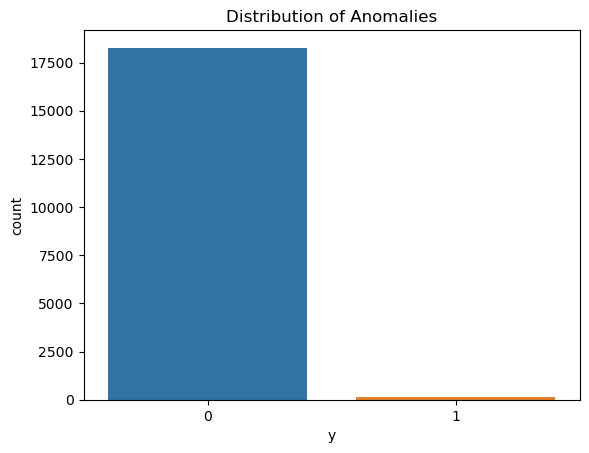

Distribution of Anomalies
0    18274
1      124
Name: y, dtype: int64


In [13]:
# anomaly distribution using countplot
sns.countplot(x='y', data = anoma_data)
plt.title('Distribution of Anomalies')
plt.show()
print('Distribution of Anomalies\n%s'%anoma_data['y'].value_counts())

C:\Users\HP\AppData\Local\Temp\ipykernel_25536\2913961310.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = anoma_data.corr()


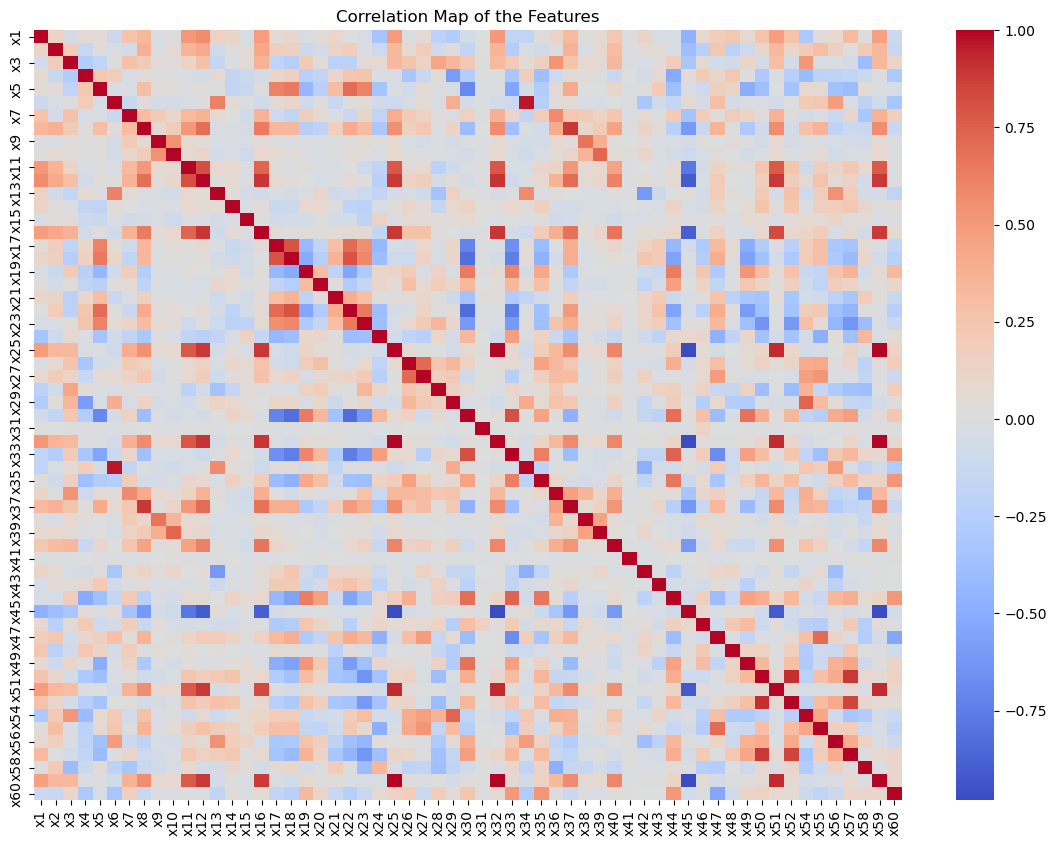

In [14]:
# correlation between variables
plt.figure(figsize=(14,10))
correlation_matrix = anoma_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot = False)
plt.title('Correlation Map of the Features')
plt.show()

In [15]:
# extracting numeric predictors
numeric_cols = anoma_data.drop(columns =['y','time'],axis =True)


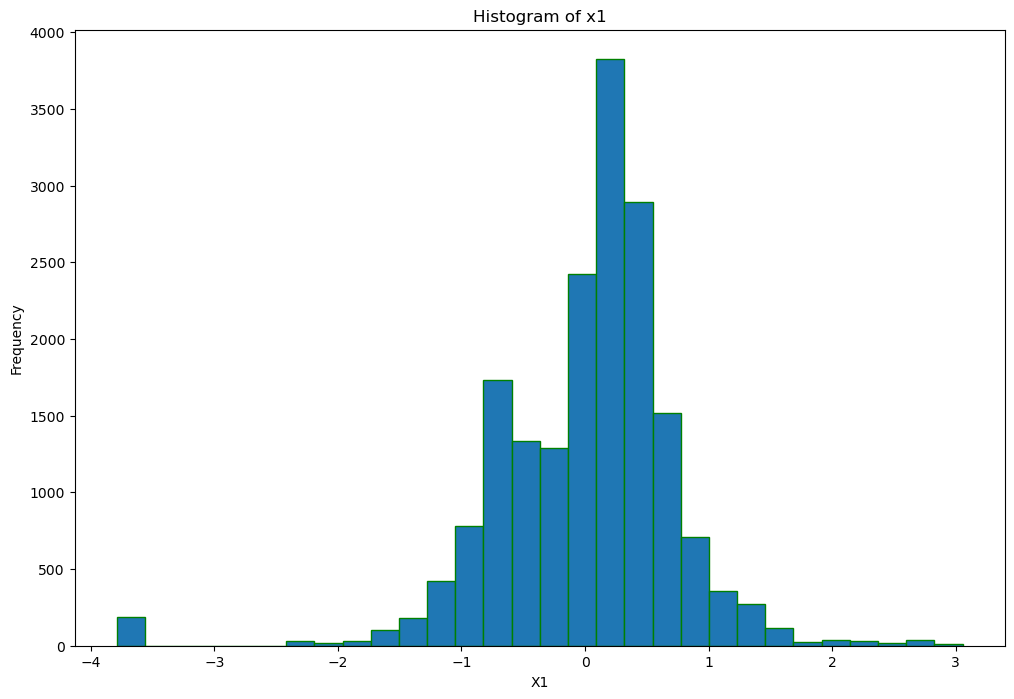

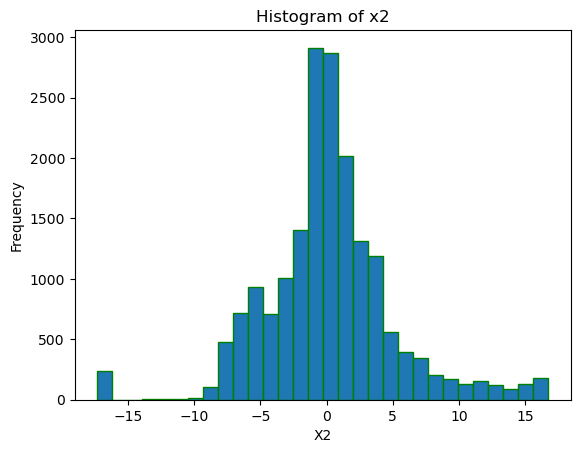

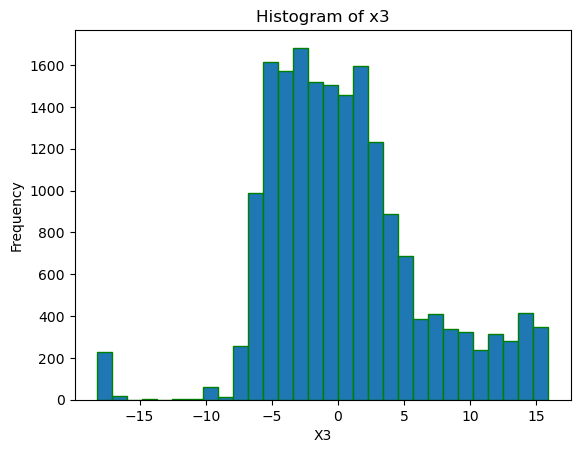

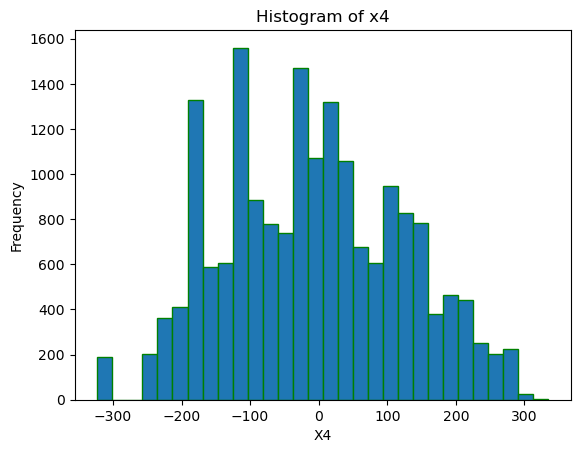

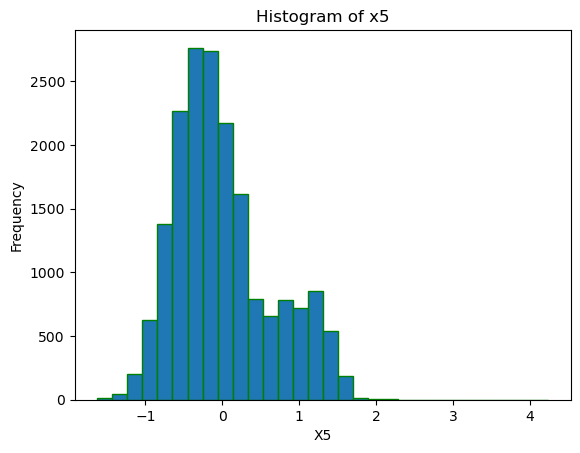

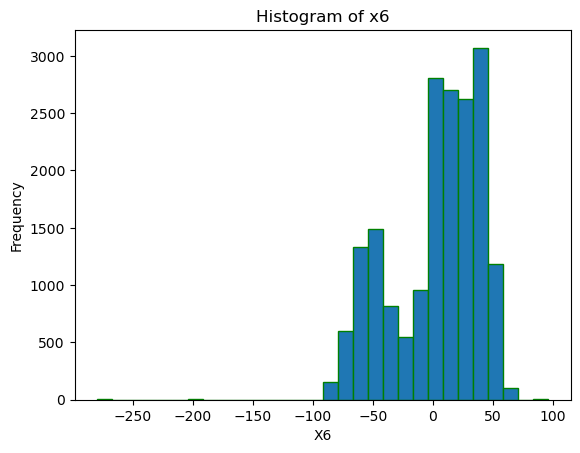

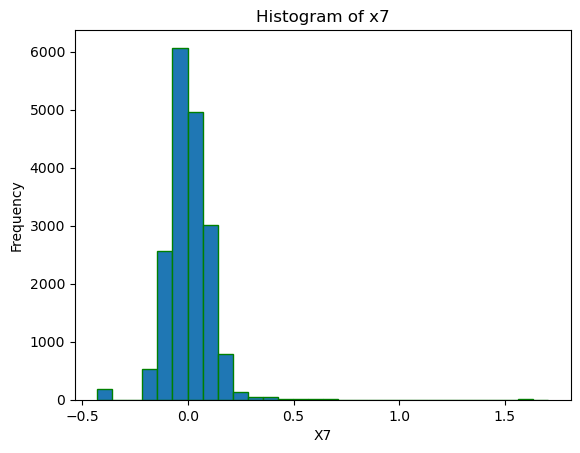

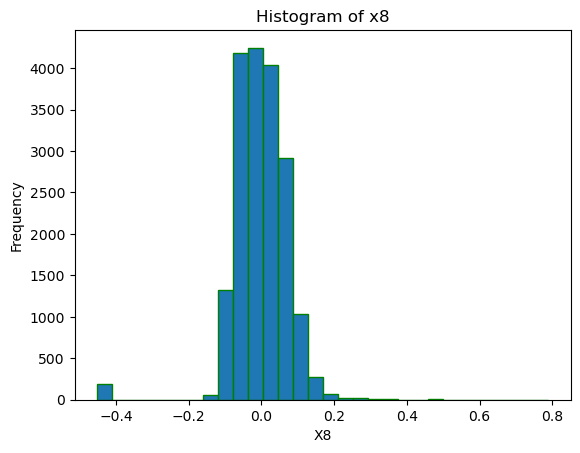

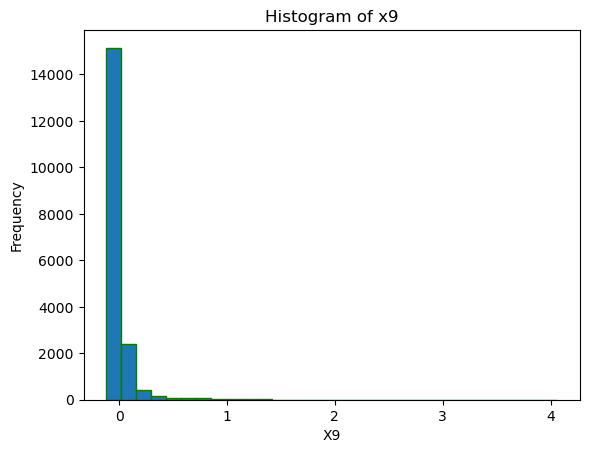

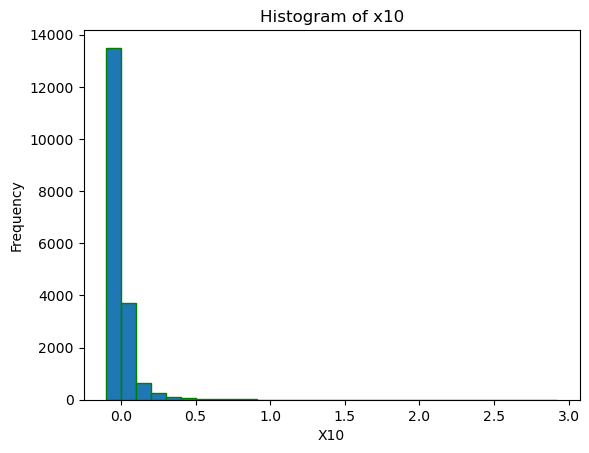

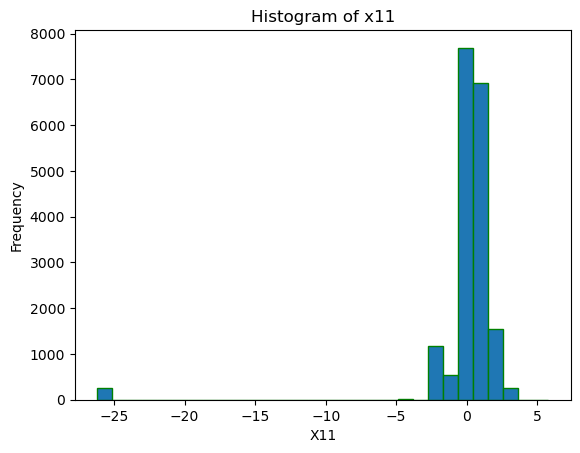

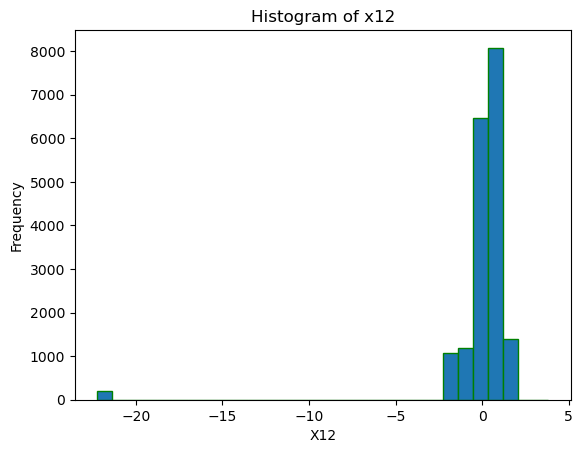

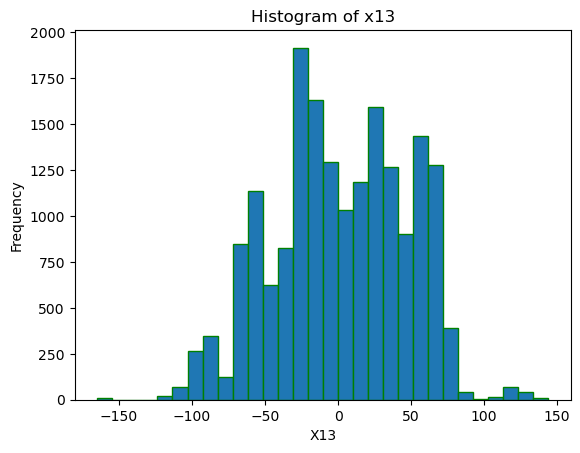

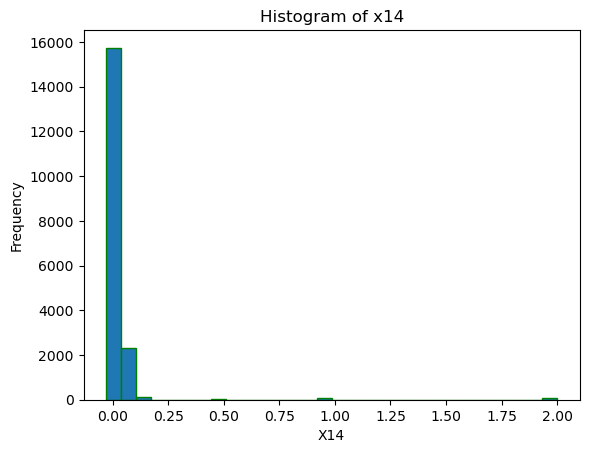

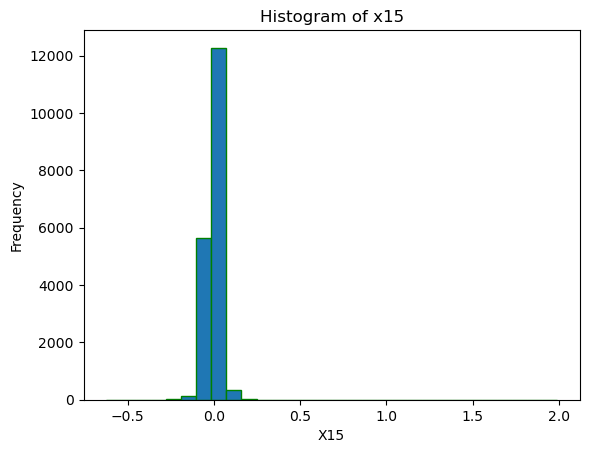

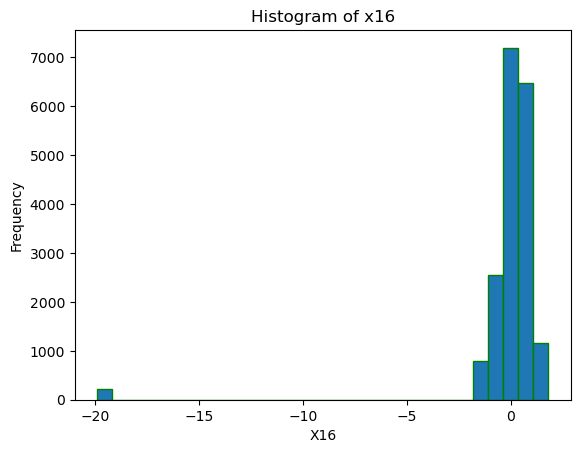

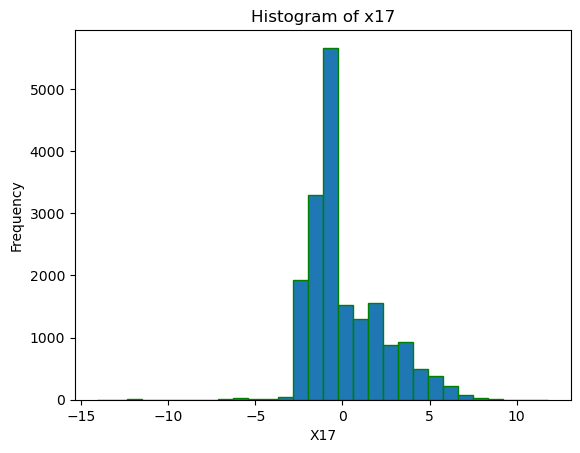

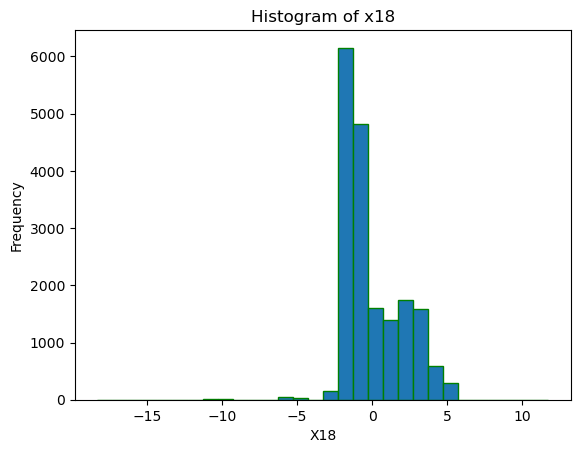

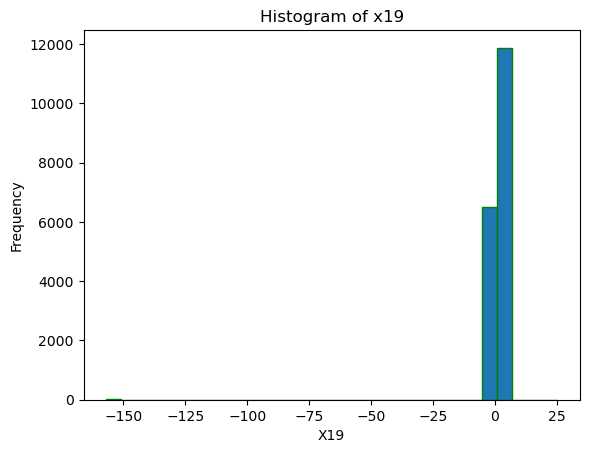

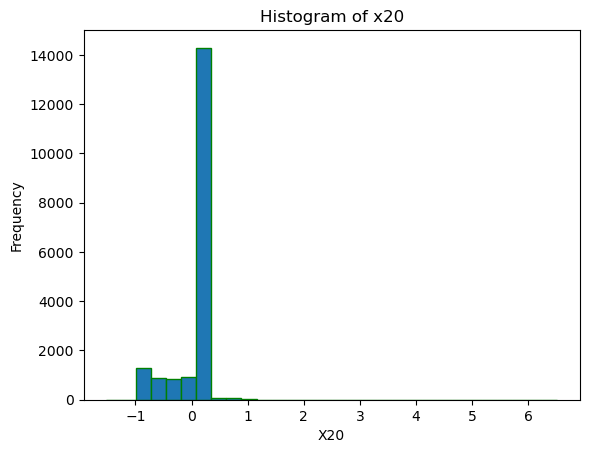

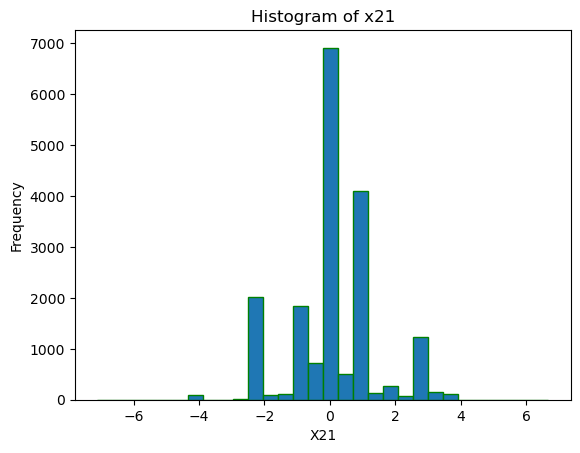

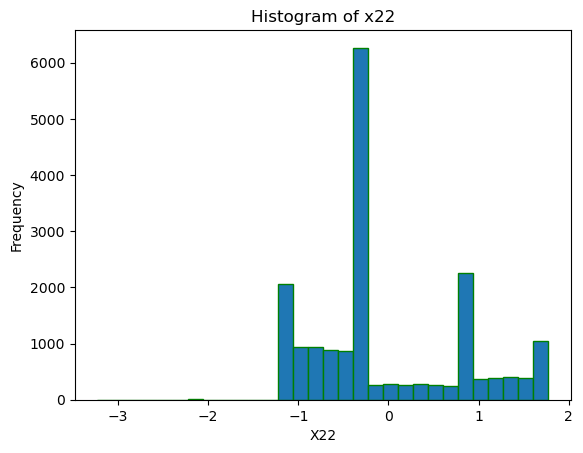

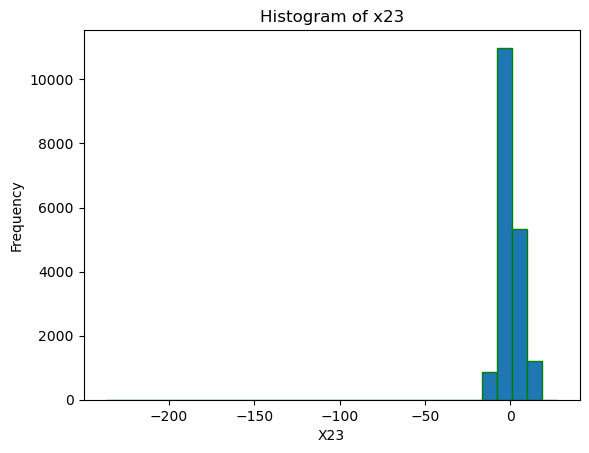

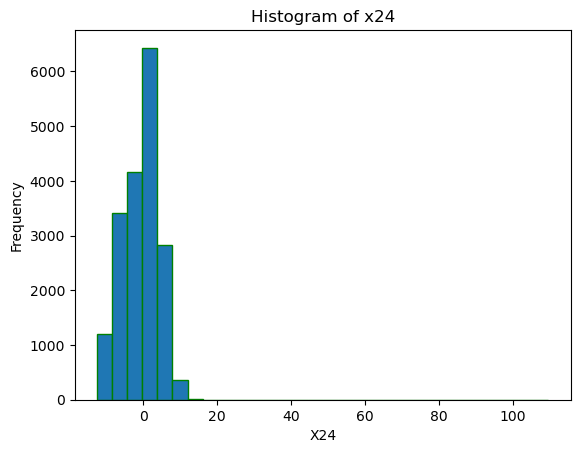

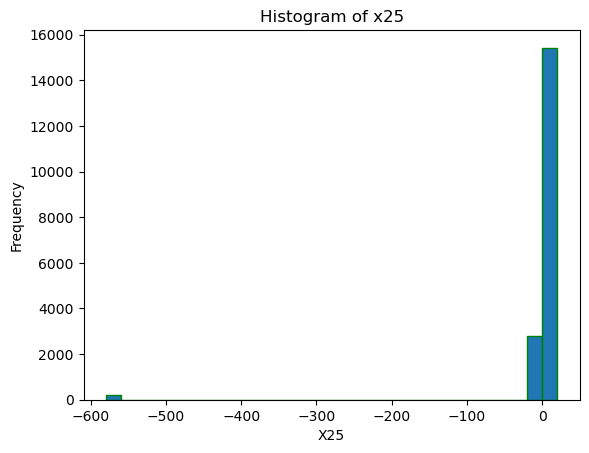

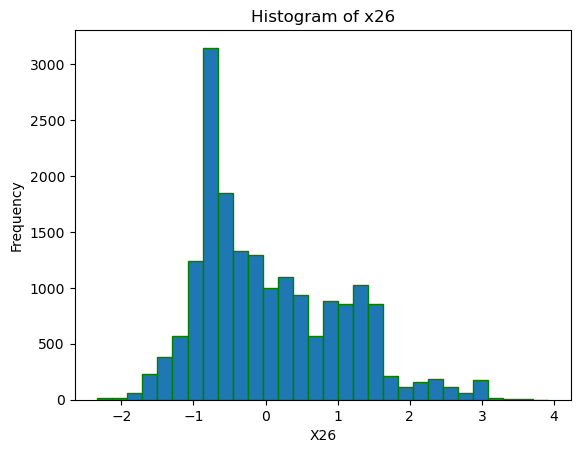

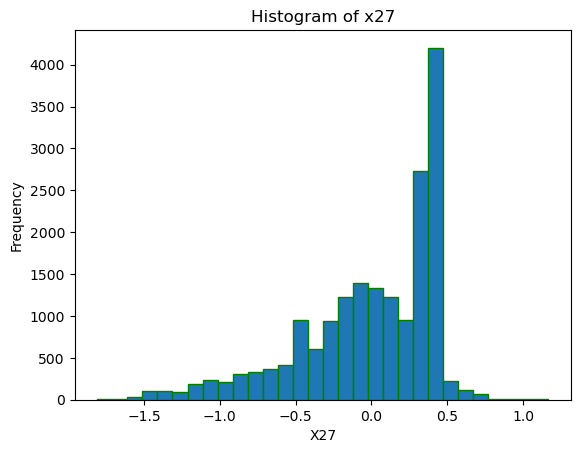

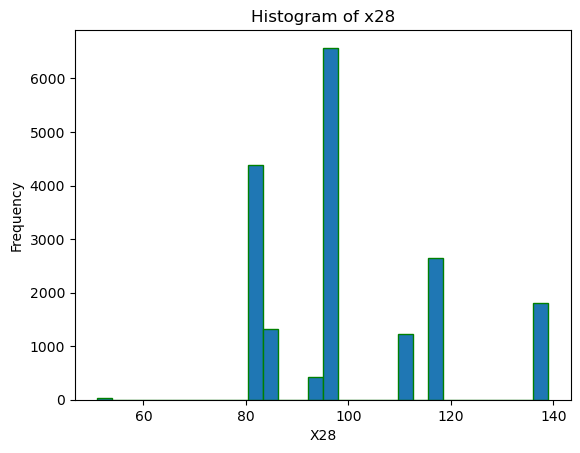

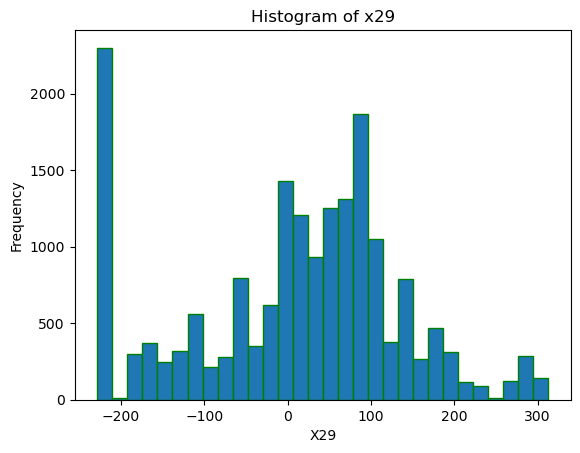

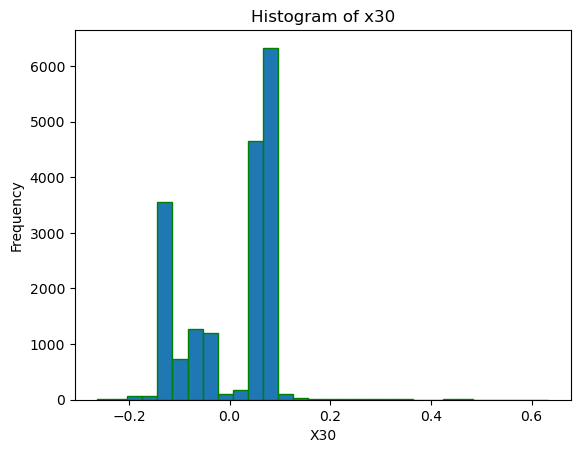

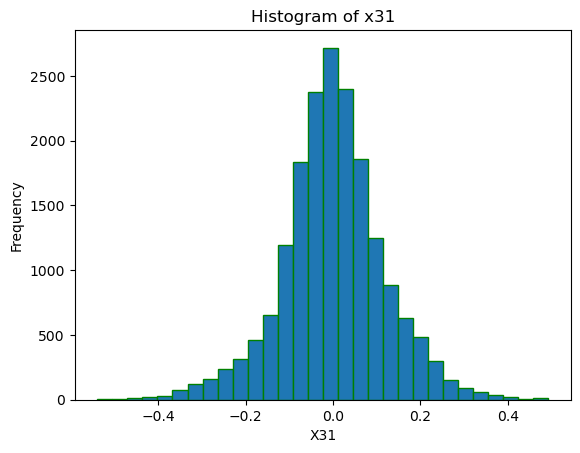

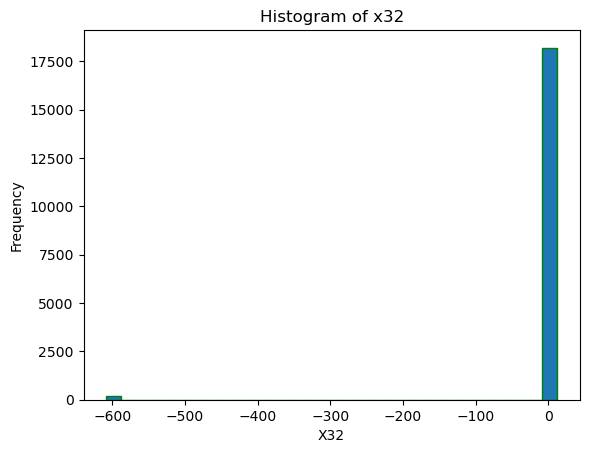

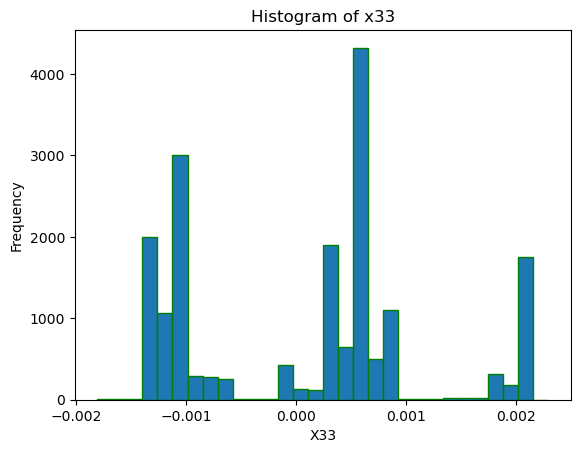

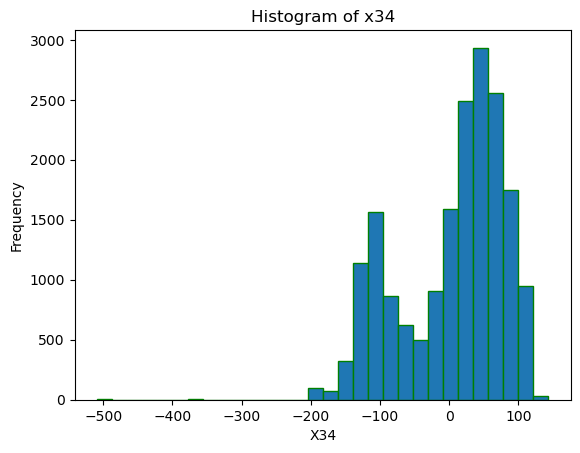

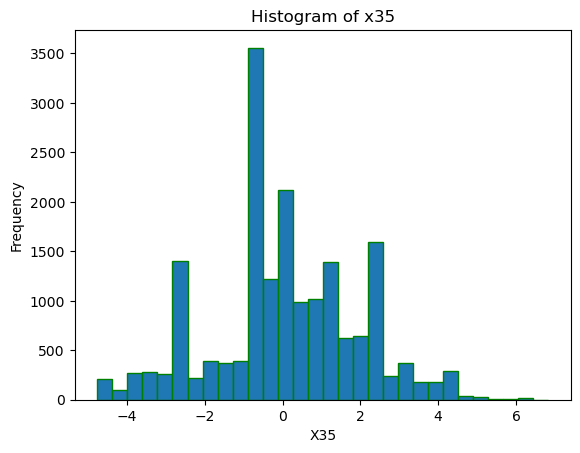

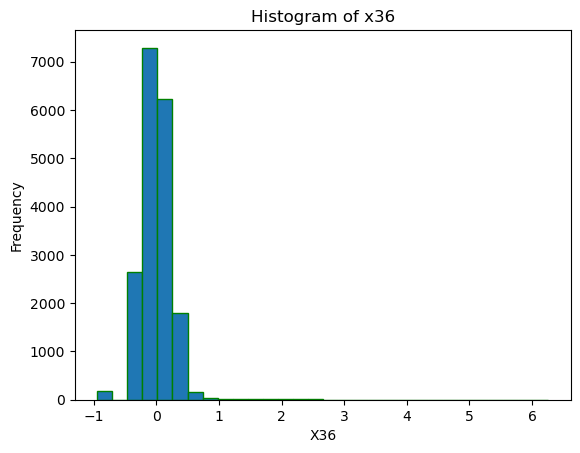

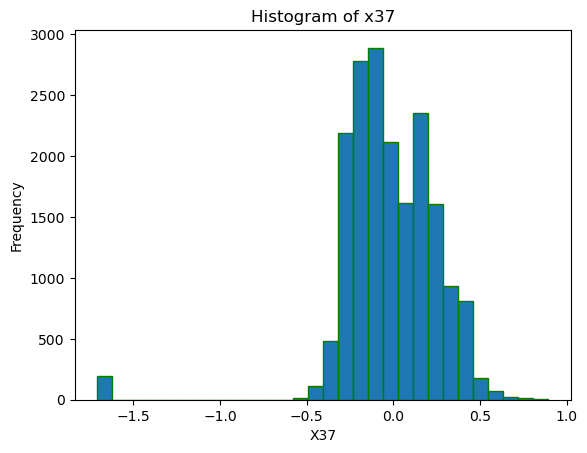

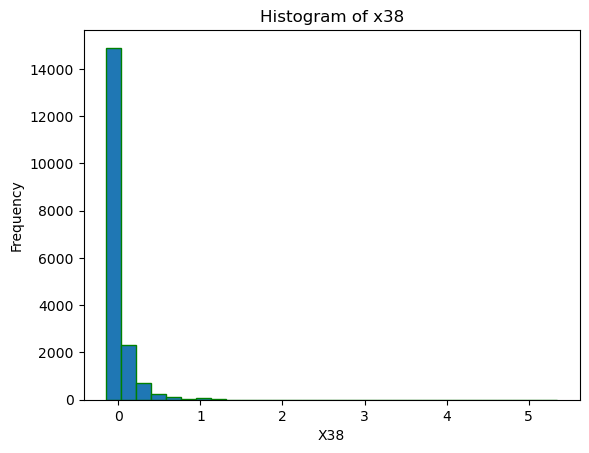

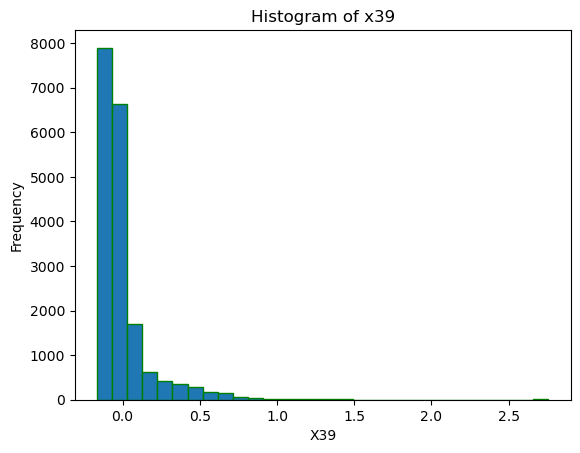

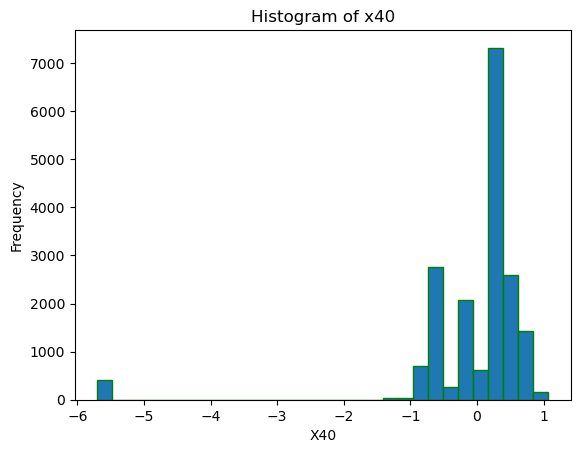

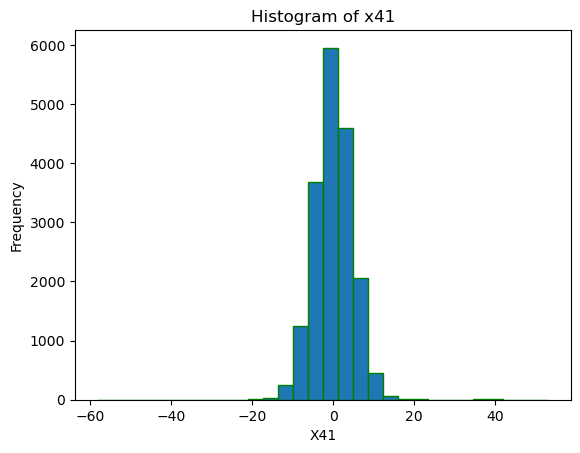

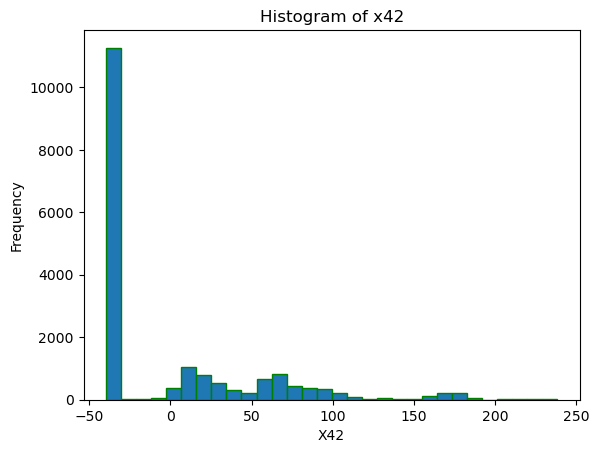

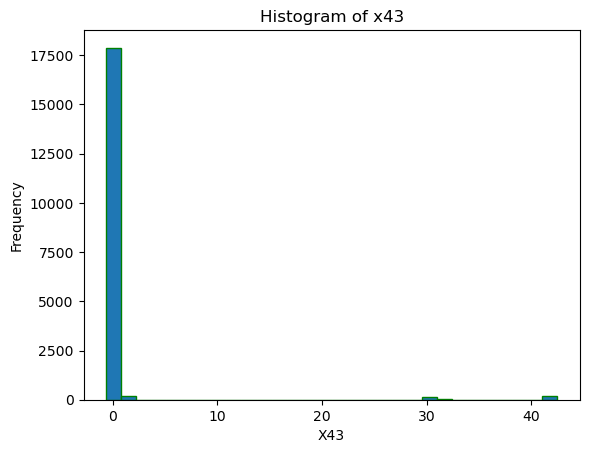

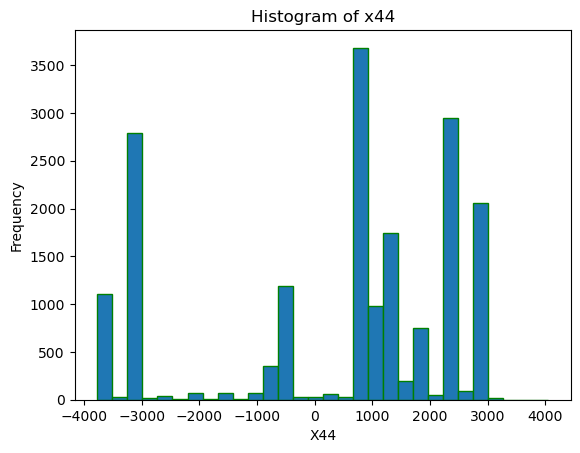

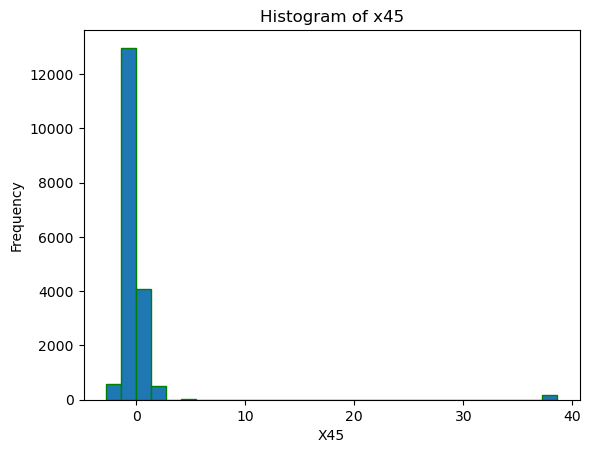

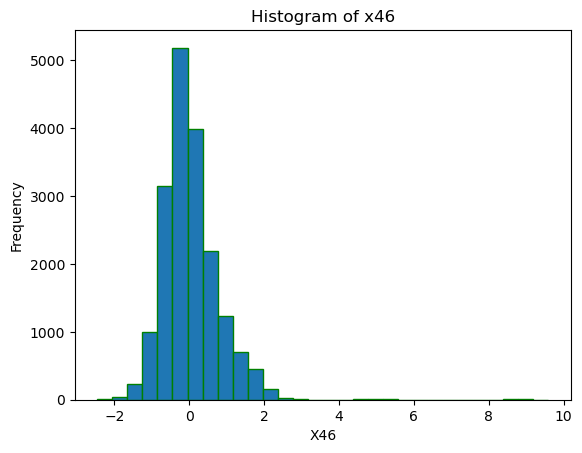

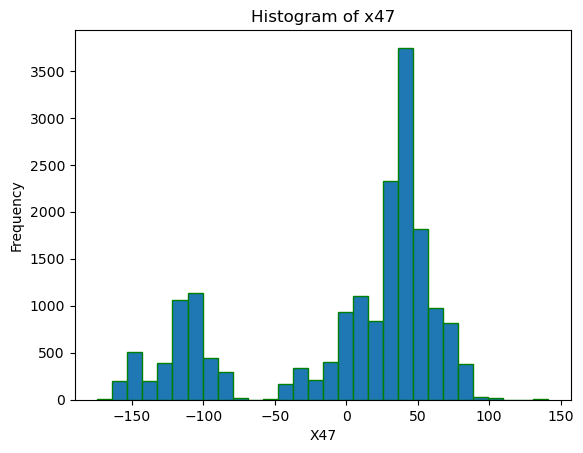

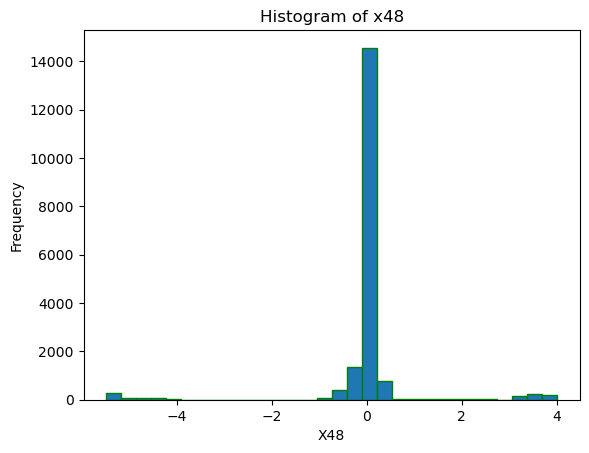

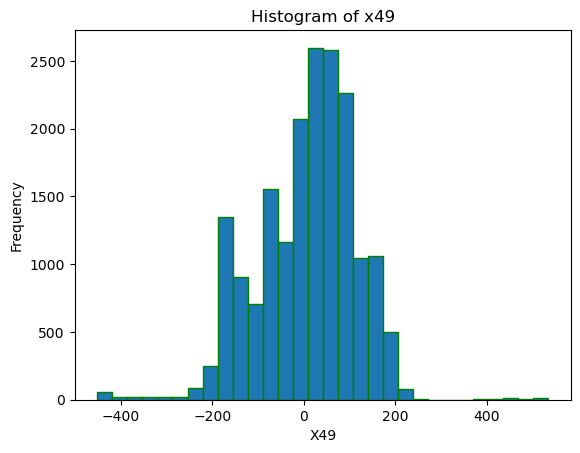

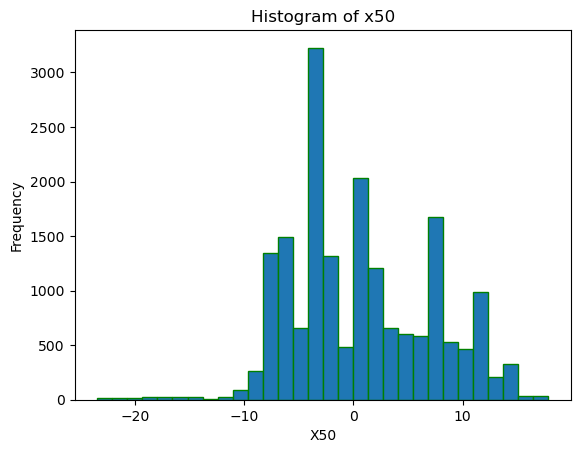

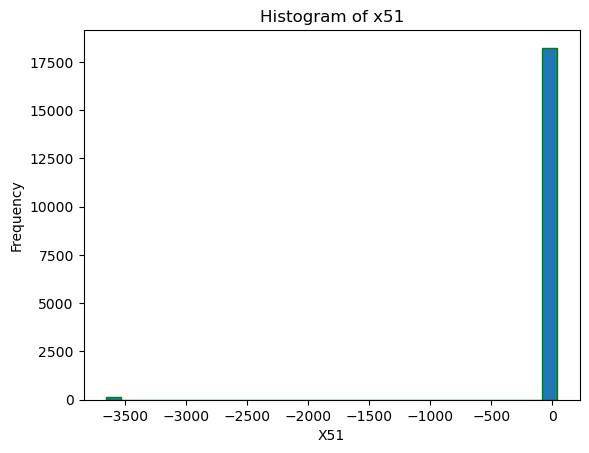

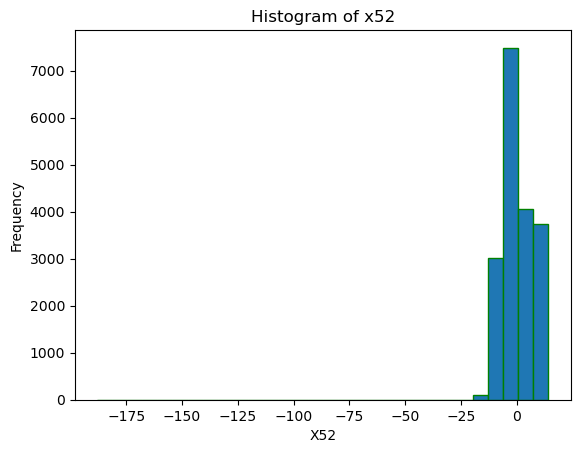

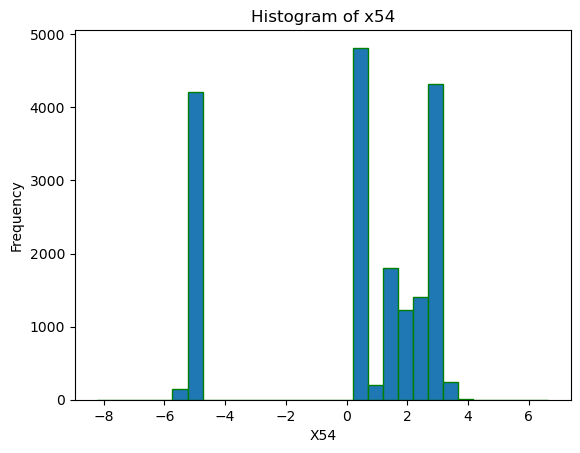

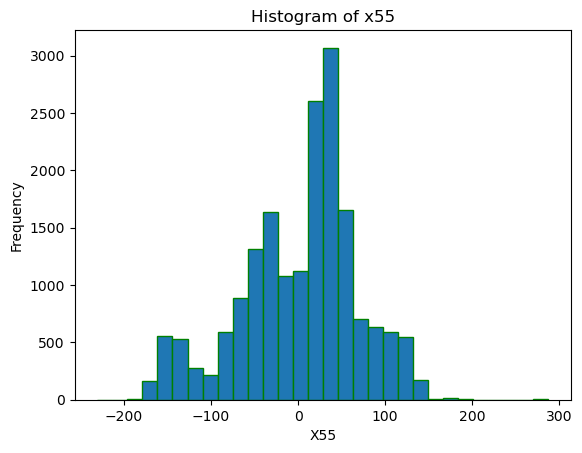

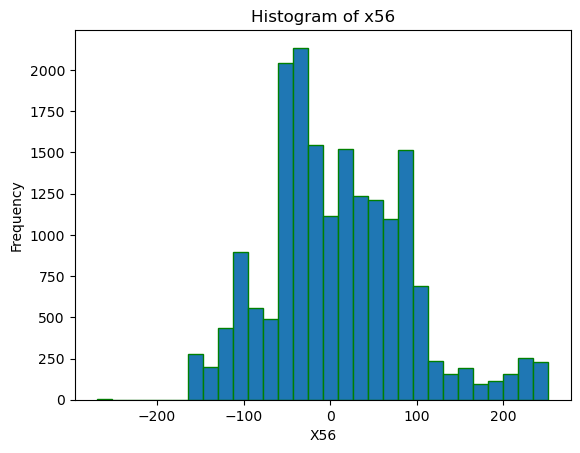

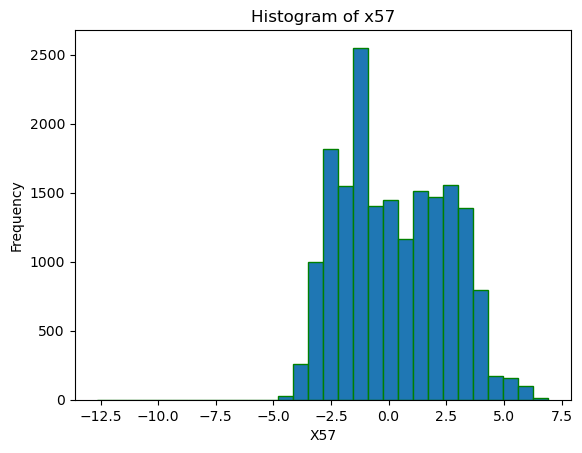

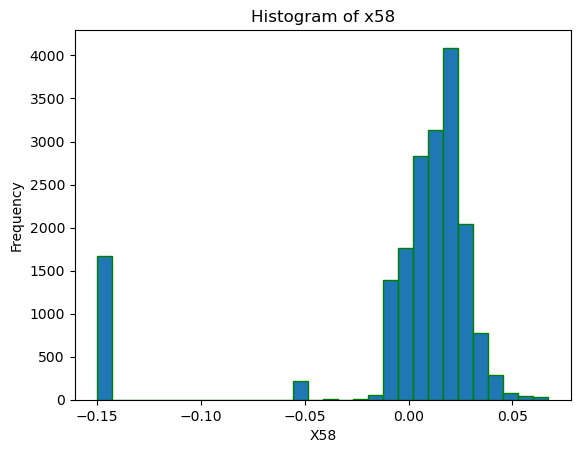

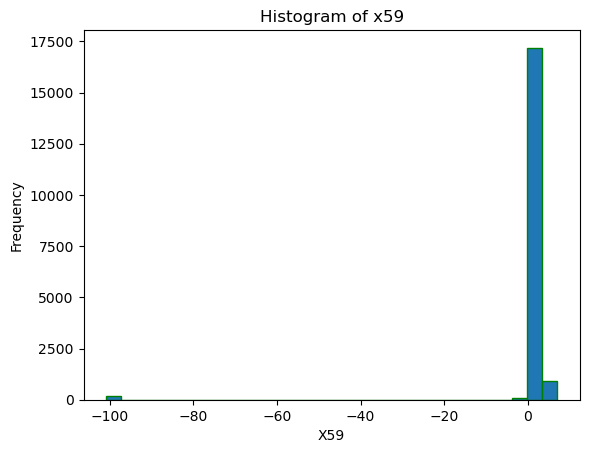

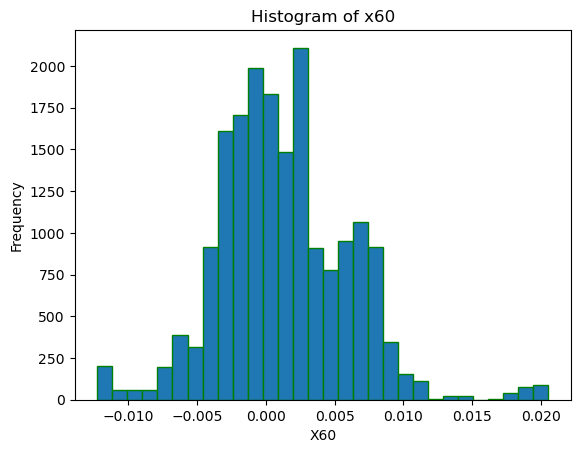

In [16]:
plt.figure(figsize =(12,8))
for col in numeric_cols.columns:
    plt.hist(x=numeric_cols[col].values, bins =30, edgecolor='green')
    plt.title('Histogram of %s'%col)
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.show()
    

In [17]:
for col in numeric_cols.columns:
    skewness =numeric_cols[col].skew()
    print('%s : %.2f' % (col, skewness))


x1 : -1.25
x2 : 0.25
x3 : 0.41
x4 : 0.13
x5 : 0.68
x6 : -0.78
x7 : 2.44
x8 : -1.60
x9 : 9.01
x10 : 8.94
x11 : -7.19
x12 : -8.36
x13 : -0.12
x14 : 10.14
x15 : 7.49
x16 : -7.89
x17 : 0.88
x18 : 0.62
x19 : -14.64
x20 : -1.20
x21 : 0.26
x22 : 0.58
x23 : -3.14
x24 : 0.55
x25 : -9.50
x26 : 0.71
x27 : -1.10
x28 : 0.87
x29 : -0.31
x30 : -0.38
x31 : -0.06
x32 : -9.62
x33 : 0.27
x34 : -0.74
x35 : -0.05
x36 : 4.80
x37 : -2.02
x38 : 9.85
x39 : 3.77
x40 : -4.41
x41 : 0.29
x42 : 1.51
x43 : 7.52
x44 : -0.75
x45 : 9.15
x46 : 2.09
x47 : -0.98
x48 : -1.81
x49 : -0.41
x50 : 0.24
x51 : -10.39
x52 : -1.31
x54 : -0.93
x55 : -0.46
x56 : 0.53
x57 : 0.20
x58 : -2.46
x59 : -9.50
x60 : 0.48


In [18]:
# getting the statistical summary of the numeric variables in the data
anoma_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,-0.002511,...,0.602553,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258
std,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,0.156047,0.106526,...,6.454156,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721
min,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,-0.098310,...,-23.448985,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229
25%,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,-0.048260,...,-3.883678,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805
50%,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,-0.030057,-0.018352,...,0.065663,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710
75%,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,0.011557,...,6.148610,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087
max,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,4.060033,2.921802,...,17.828847,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510


In [19]:
 # statistical summary of the target variable
anoma_data['y'].describe()

count     18398
unique        2
top           0
freq      18274
Name: y, dtype: int64

### Feature Engineering

In [20]:
X =anoma_data.drop(columns =['y','time'], axis =True)
y= anoma_data['y']

In [21]:
# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Organising data into train set and test set where the test data is 20% of the dataset.

In [22]:
X_train,  X_test, y_train, y_test =train_test_split(X_scaled,y, test_size=0.2, random_state =42, stratify =y)
# use 'stratify' attribute to ensure the distribution of the original data is also maintained in the splited data.

### Training and Testing a classification model using random forest classifier

In [23]:
rfModel = RandomForestClassifier(random_state=42) # creating a model object
rfModel.fit(X_train,y_train) # training the model

RandomForestClassifier(random_state=42)

In [24]:
# making predictions using the test data
y_pred= rfModel.predict(X_test)

### Evaluating the model performance

In [25]:
accuracy = accuracy_score(y_test,y_pred)
print("The model is %.3f%% accurate"%(accuracy*100))

The model is 99.728% accurate


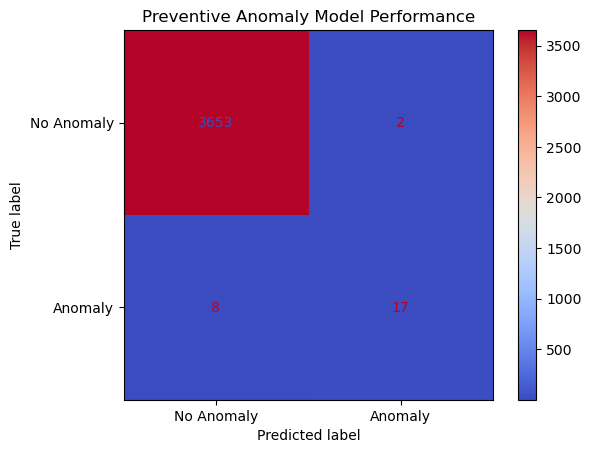

In [26]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =['No Anomaly','Anomaly'])
display.plot(cmap ='coolwarm')
plt.title('Preventive Anomaly Model Performance')
plt.show()

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.89      0.68      0.77        25

    accuracy                           1.00      3680
   macro avg       0.95      0.84      0.89      3680
weighted avg       1.00      1.00      1.00      3680



### Hyperparameter Tuning

In [28]:

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfModel, param_grid=param_grid, cv=3)

# Train the model with the best parameters
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [35]:

# Save the model/deployment plan
joblib.dump(grid_search.best_estimator_, 'predictive_maintenance_model.pkl')

['predictive_maintenance_model.pkl']

In [36]:
model = joblib.load('predictive_maintenance_model.pkl')

In [37]:
type(model)

sklearn.ensemble._forest.RandomForestClassifier

In [34]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}